In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Hotel Reservations.csv')
print(df.head())

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [3]:
df.shape

(36275, 19)

In [4]:
df.duplicated().sum()

0

In [5]:
df=df.drop('Booking_ID', axis=1)

print(df.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segm

In [6]:
df.shape

(36275, 18)

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [9]:
df = df.sort_values(by=['arrival_year', 'arrival_month', 'arrival_date']).reset_index(drop=True)
split_index = round(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]


In [10]:
numerical_cols = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 
    'no_of_week_nights','lead_time',  
    'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 
    'avg_price_per_room', 'no_of_special_requests'
]

X = train[numerical_cols]


In [11]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(X)

# Predict outliers: 1 = normal, -1 = outlier
train['outlier'] = iso.predict(X)


C:\Users\Vayani Kavindya\AppData\Local\Temp\ipykernel_22624\531191255.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['outlier'] = iso.predict(X)


In [12]:
# Number of outliers
print(train['outlier'].value_counts())

# Filter outliers
outliers = train[train['outlier'] == -1]
normal = train[train['outlier'] == 1]

print(outliers.head())


outlier
 1    27569
-1     1451
Name: count, dtype: int64
     no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
95              1               0                     5                 15   
97              1               0                     5                 15   
103             1               0                     5                 15   
136             1               0                     3                  6   
360             1               0                     4                 11   

    type_of_meal_plan  required_car_parking_space room_type_reserved  \
95        Meal Plan 1                           0        Room_Type 1   
97       Not Selected                           0        Room_Type 1   
103      Not Selected                           0        Room_Type 1   
136       Meal Plan 1                           0        Room_Type 1   
360       Meal Plan 1                           0        Room_Type 1   

     lead_time  arrival_year  arrival_mo

In [13]:
# Count of normal and outlier points
train['outlier'].value_counts()

num_outliers = (train['outlier'] == -1).sum()
print(f"Number of outliers: {num_outliers}")

Number of outliers: 1451


In [14]:
percent_outliers = (train['outlier'] == -1).mean() * 100
print(f"Percentage of outliers: {percent_outliers:.2f}%")


Percentage of outliers: 5.00%


In [15]:
train = train.drop('outlier', axis=1)

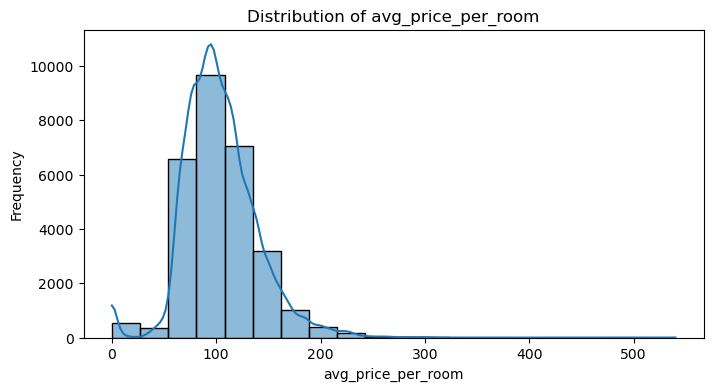

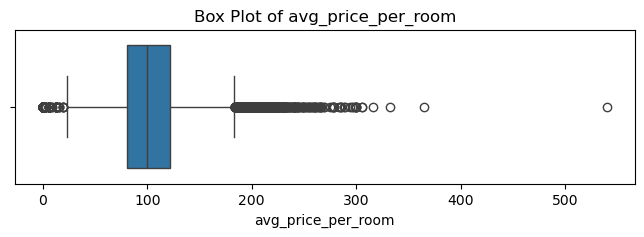

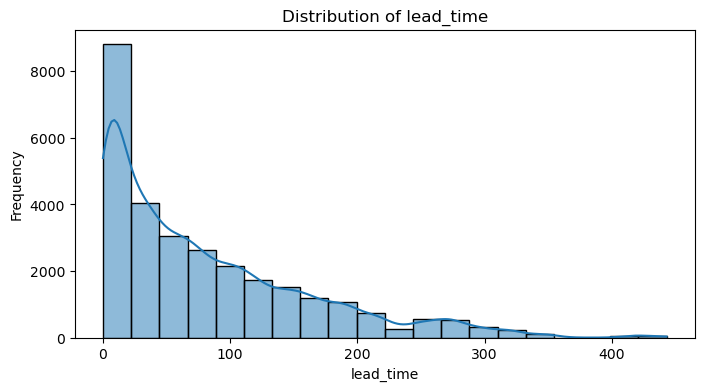

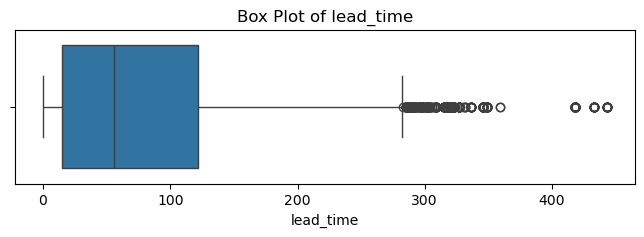

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

cols=['avg_price_per_room', 'lead_time']

for i in cols:
    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(train[i], kde=True, bins=20)  
    plt.xlabel(i)
    plt.title(f"Distribution of {i}")
    plt.ylabel("Frequency")
    plt.show()
    
    # Box plot
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=train[i])
    plt.xlabel(i)
    plt.title(f"Box Plot of {i}")
    plt.show()

In [17]:
train.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                322
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               7
no_of_previous_bookings_not_canceled      47
avg_price_per_room                      3337
no_of_special_requests                     6
booking_status                             2
dtype: int64

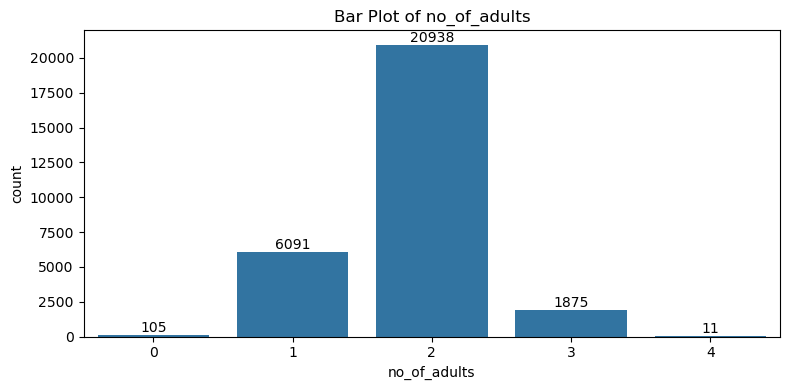

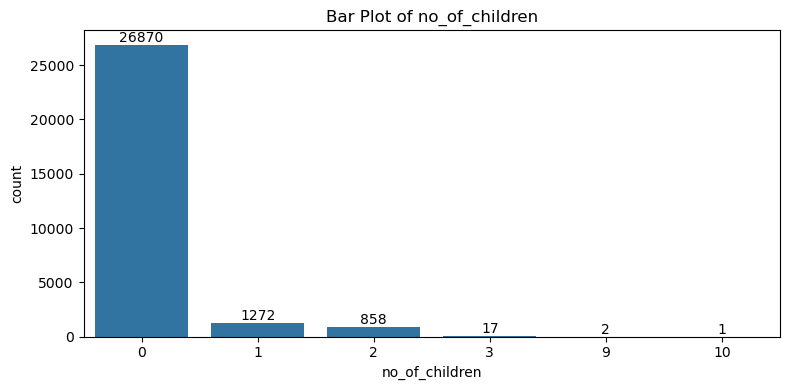

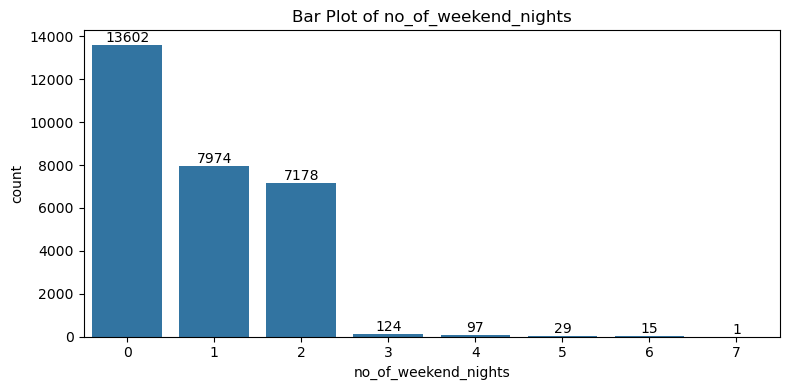

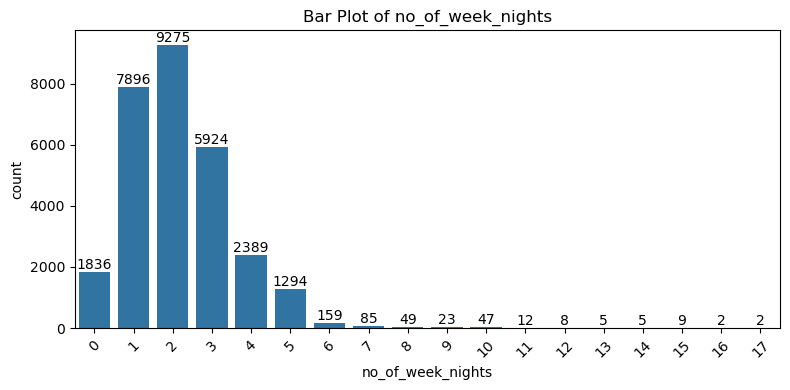

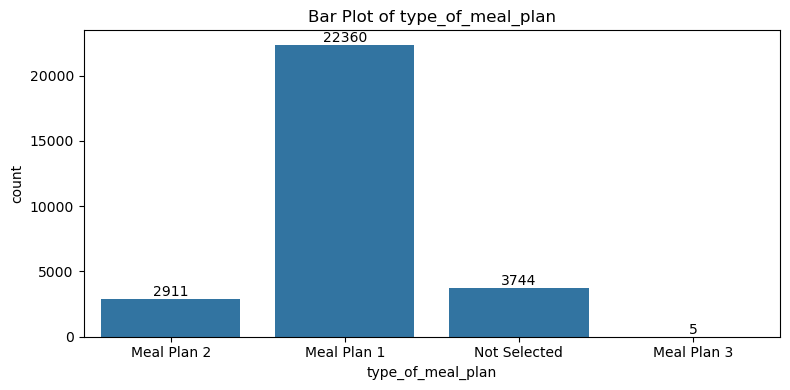

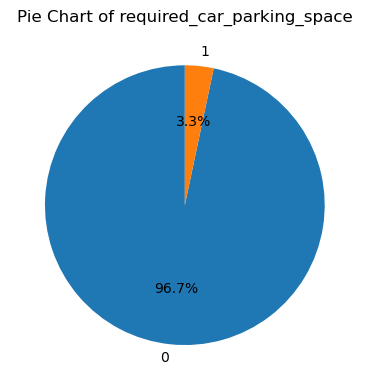

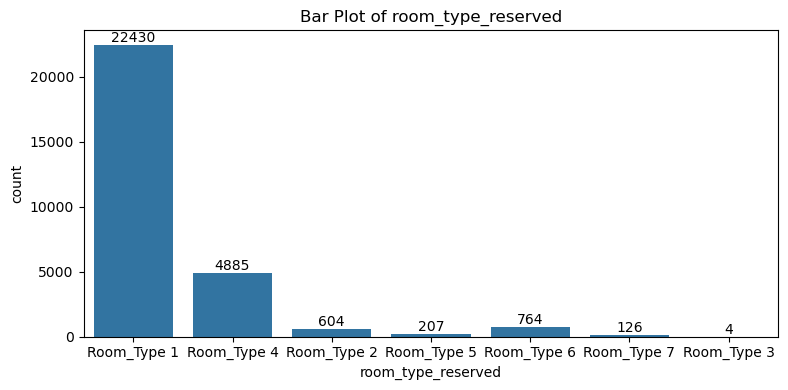

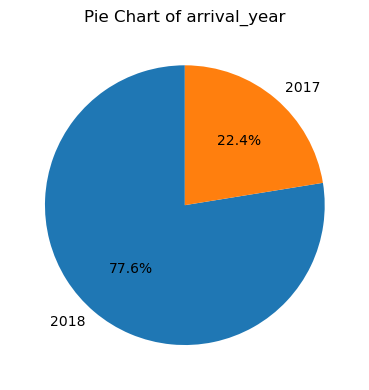

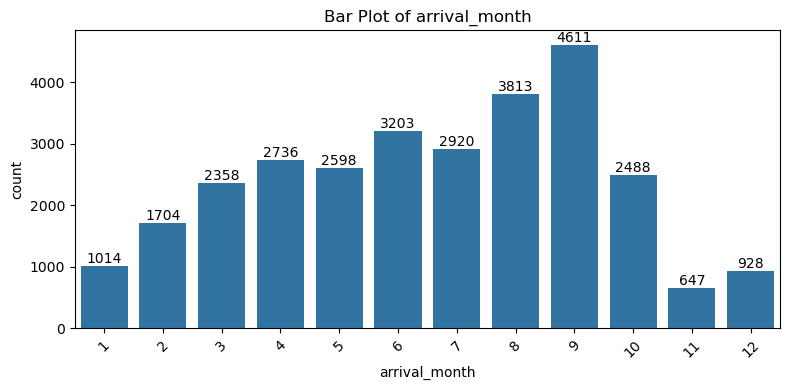

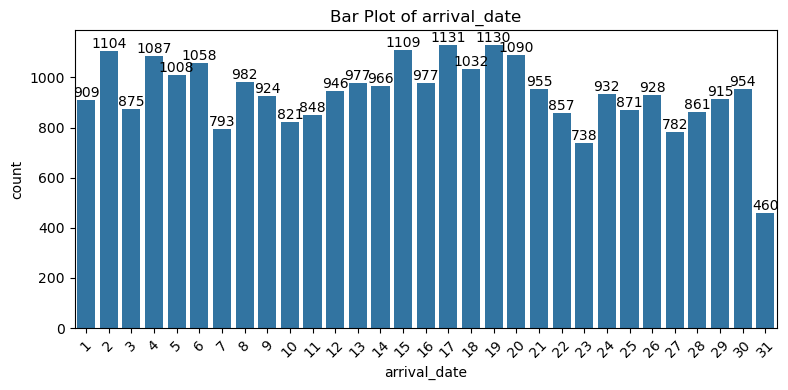

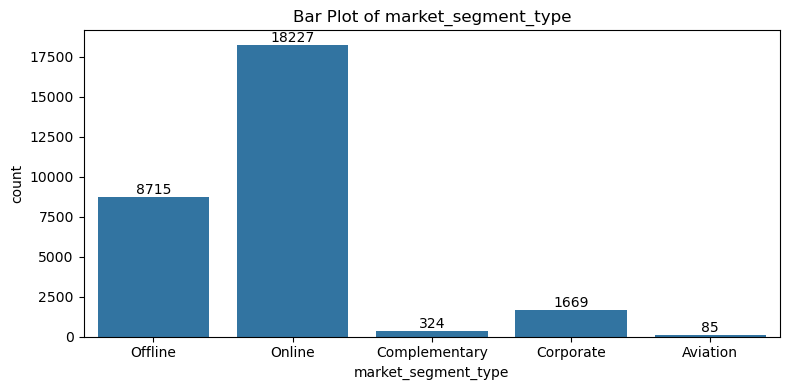

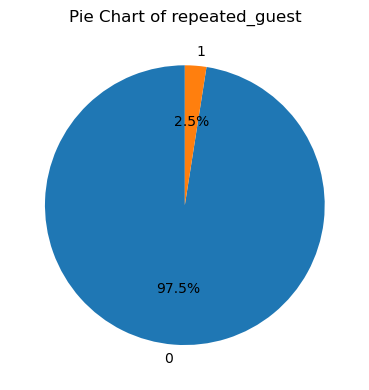

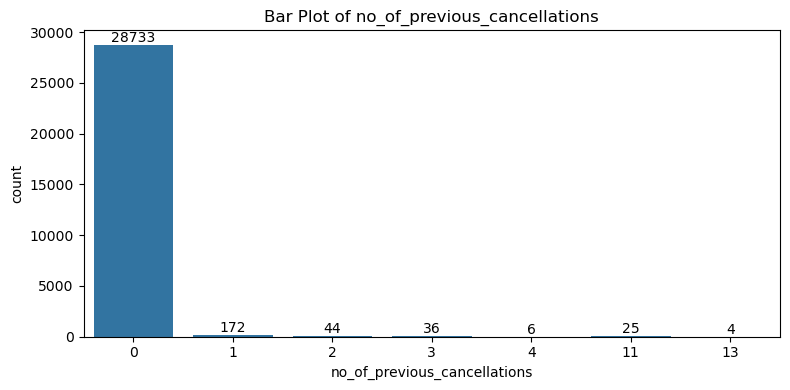

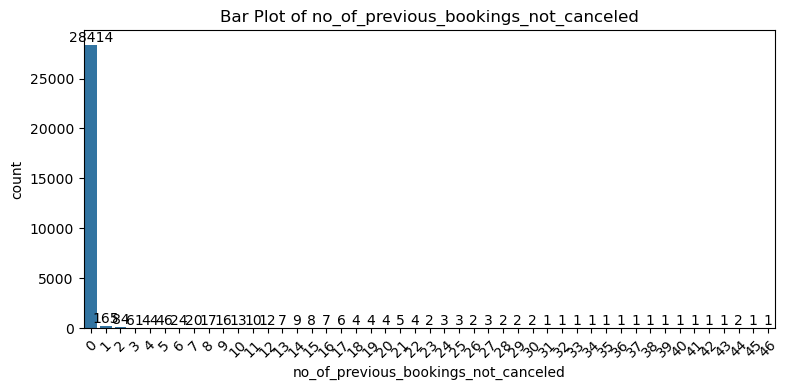

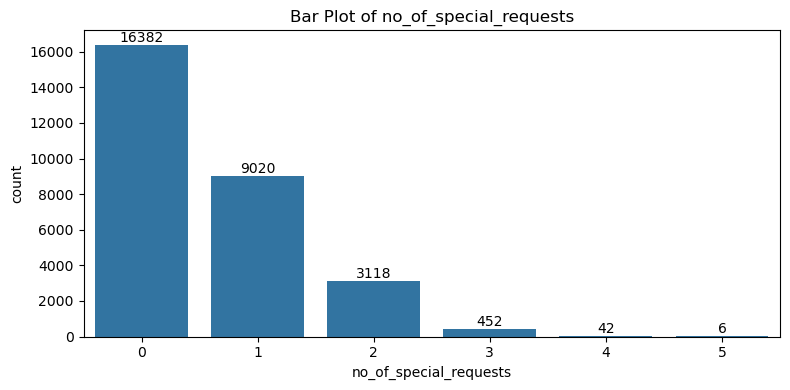

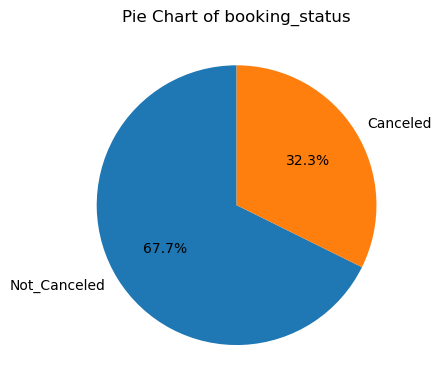

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for col in train.columns:
    # Skip lead_time and avg_price_per_room
    if col == 'lead_time' or col == 'avg_price_per_room':
        continue
    
    unique_vals = train[col].nunique()
    
    plt.figure(figsize=(8, 4))  # wider figure
    
    # Pie chart for ≤ 3 unique values
    if unique_vals <= 3:
        counts = train[col].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Pie Chart of {col}')
    
    else:
        # Determine order for bar plot
        if pd.api.types.is_numeric_dtype(train[col]):
            order_vals = sorted(train[col].unique())  # ascending numeric order
        else:
            order_vals = train[col].unique()  # original order for non-numeric
        
        # Bar plot
        ax = sns.countplot(x=col, data=train, order=order_vals)
        
        # Add integer counts on top of bars
        for p in ax.patches:
            height = int(p.get_height())
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)
        
        plt.title(f'Bar Plot of {col}')
        if unique_vals > 10:  # rotate labels if too many categories
            plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


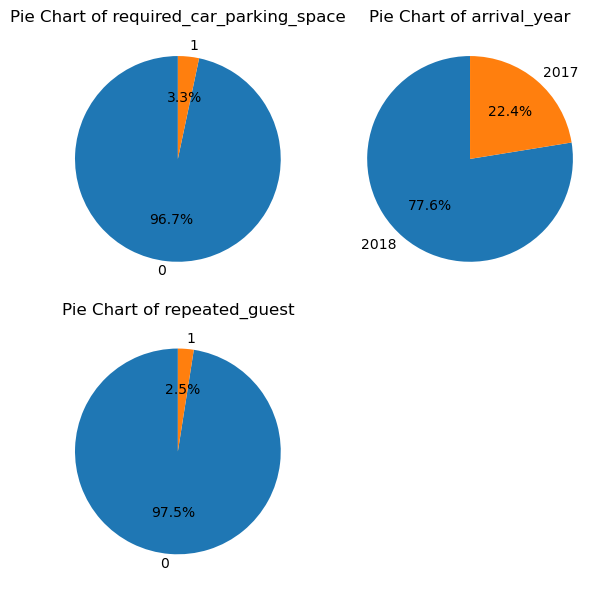

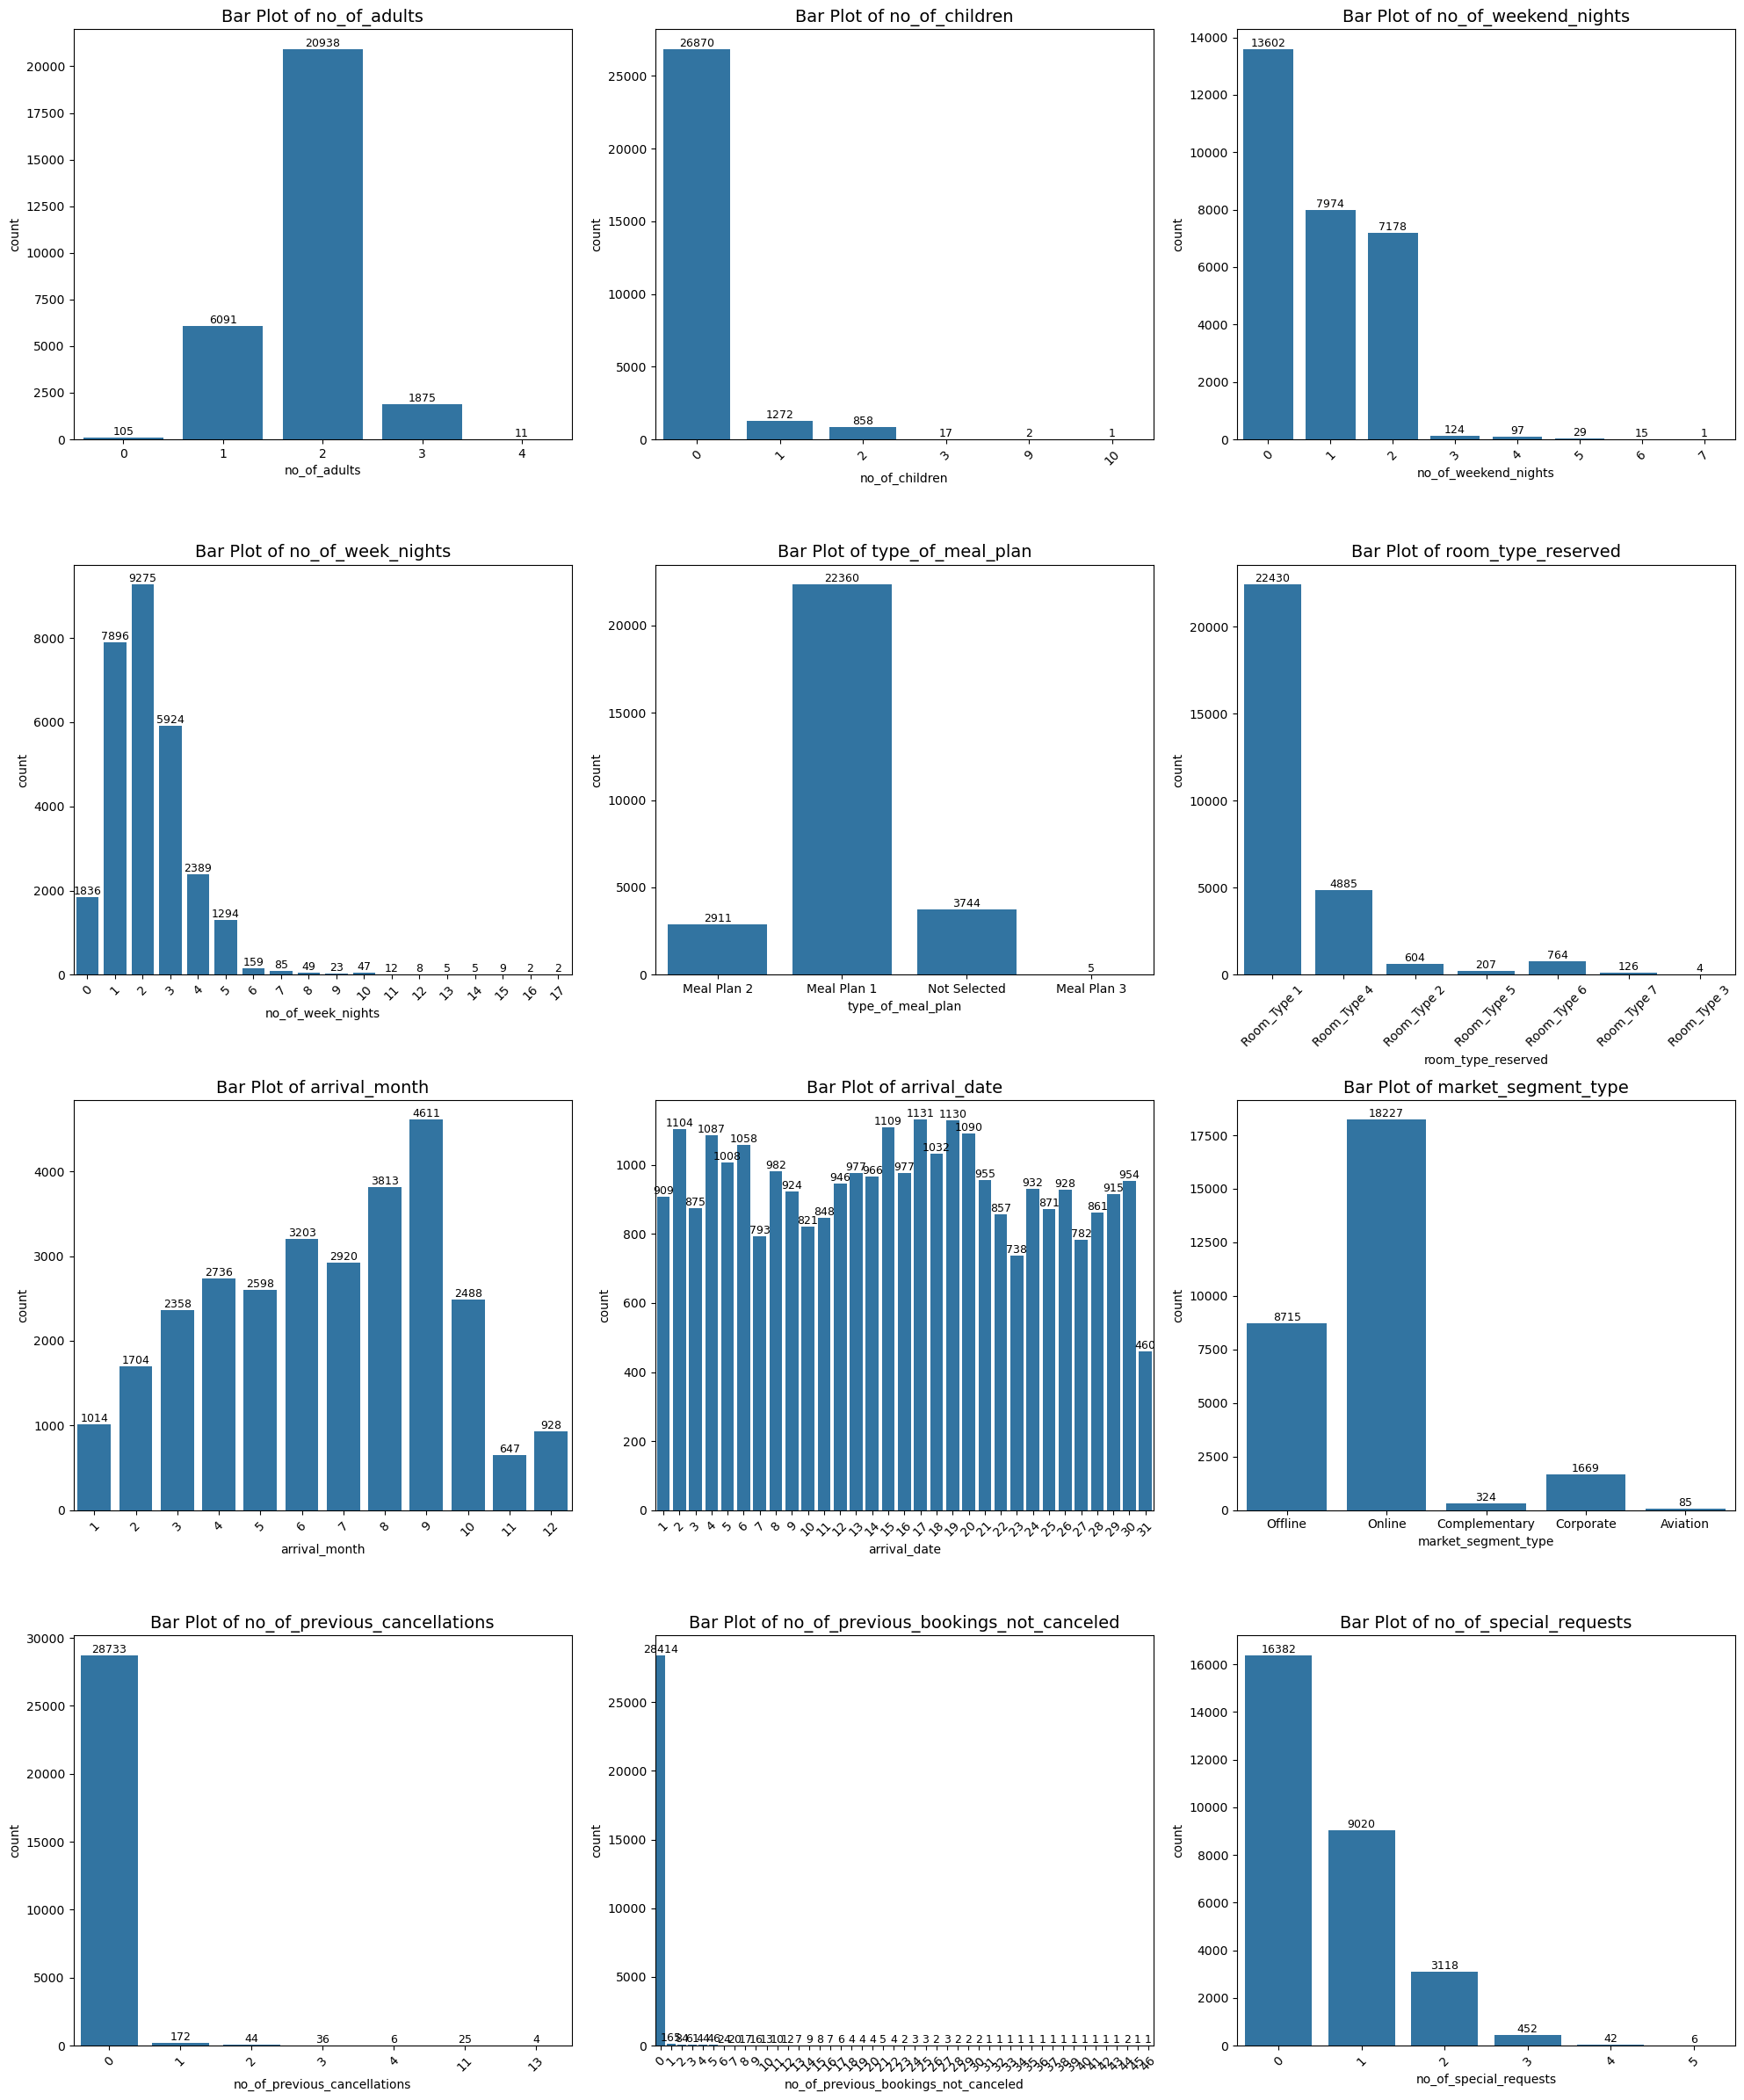

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Separate columns into bar and pie categories
bar_cols = []
pie_cols = []

for col in train.columns:
    if col in ['lead_time', 'avg_price_per_room','booking_status']:
        continue
    unique_vals = train[col].nunique()
    if unique_vals <= 3:
        pie_cols.append(col)
    else:
        bar_cols.append(col)

# ---------- PIE CHARTS ----------
if pie_cols:
    n = len(pie_cols)
    ncols = 2
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(6, 3 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(pie_cols):
        counts = train[col].value_counts()
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Pie Chart of {col}', fontsize=12)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# ---------- BAR PLOTS ----------
if bar_cols:
    n = len(bar_cols)
    ncols = 3
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 6* nrows))
    axes = axes.flatten()

    for i, col in enumerate(bar_cols):
        unique_vals = train[col].nunique()
        if pd.api.types.is_numeric_dtype(train[col]):
            order_vals = sorted(train[col].unique())
        else:
            order_vals = train[col].unique()

        ax = sns.countplot(x=col, data=train, order=order_vals, ax=axes[i])
        axes[i].set_title(f'Bar Plot of {col}', fontsize=14)
        axes[i].tick_params(axis='x', rotation=45 if unique_vals > 5 else 0)

        # Add counts on top
        for p in ax.patches:
            height = int(p.get_height())
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


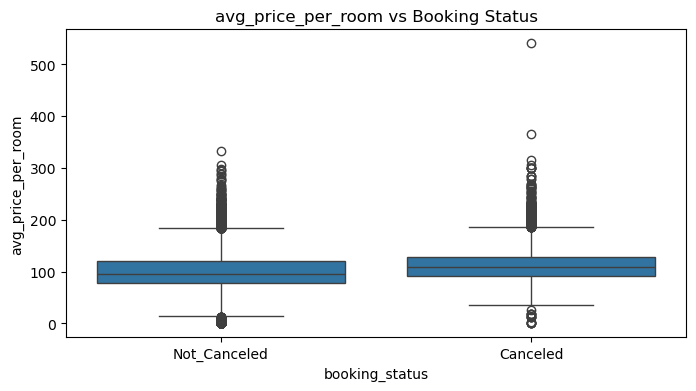

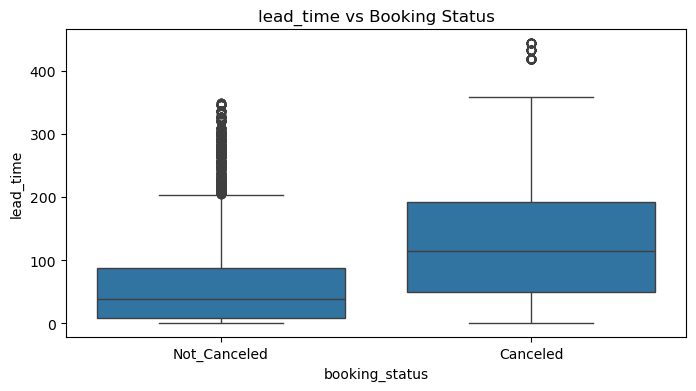

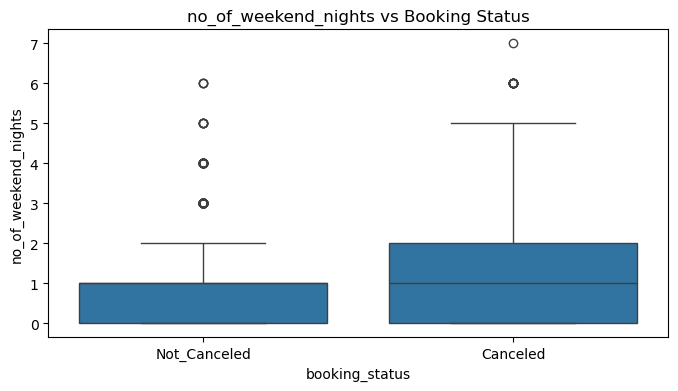

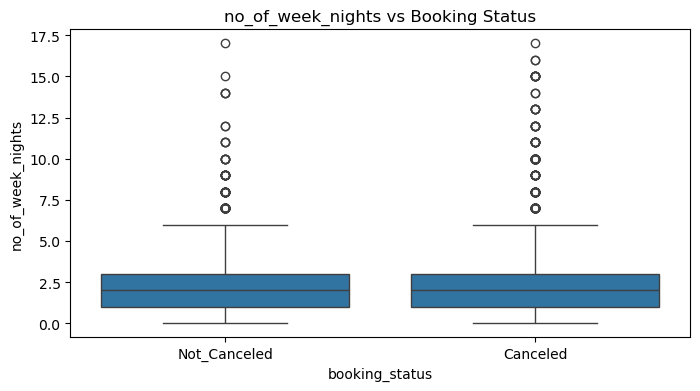

In [20]:
numerical_cols = ['avg_price_per_room', 'lead_time','no_of_weekend_nights', 'no_of_week_nights']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='booking_status', y=col, data=train)
    plt.title(f'{col} vs Booking Status')
    plt.show()


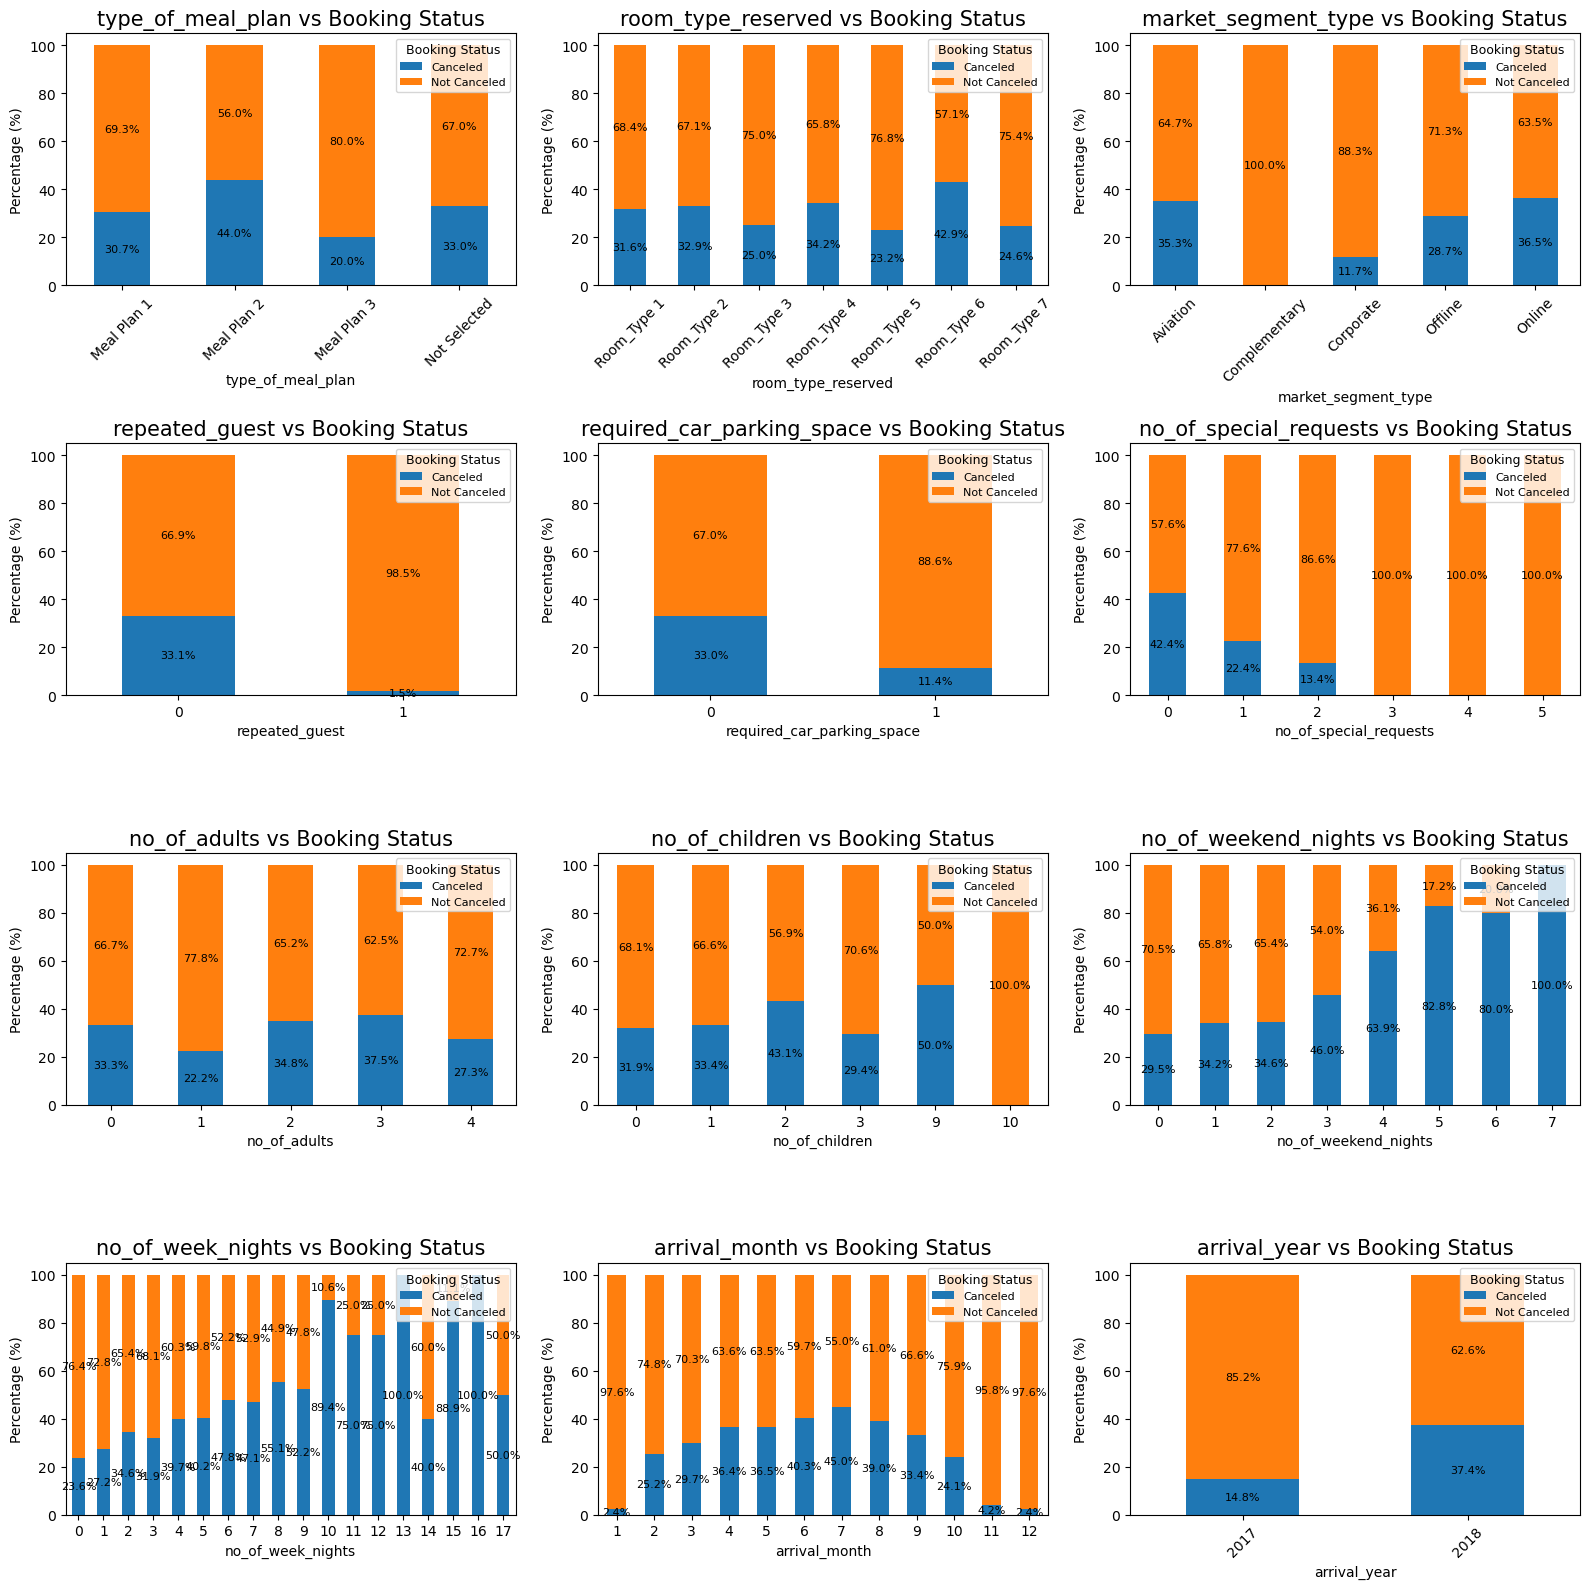

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Define your variable groups
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type','repeated_guest','required_car_parking_space']
discrete_cols = ['no_of_special_requests', 'no_of_adults', 
                 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights']
single_cols = ['arrival_month','arrival_year']

# Combine all for a single visualization grid
all_cols = categorical_cols + discrete_cols + single_cols

n = len(all_cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()

# Iterate through each variable
for idx, col in enumerate(all_cols):
    ax = axes[idx]
    
    # Create crosstab
    ct = pd.crosstab(train[col], train['booking_status'])
    
    # Convert to percentages
    ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
    
    # Plot
    ct_percent.plot(
        kind='bar',
        stacked=True,
        color=['#1f77b4', '#ff7f0e'],
        ax=ax
    )
    
    # Add legend for each subplot
    ax.legend(title='Booking Status', labels=['Canceled', 'Not Canceled'], loc='upper right', fontsize=8, title_fontsize=9)
    
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel(col)
    ax.set_title(f'{col} vs Booking Status', fontsize=15)
    ax.tick_params(axis='x', rotation=45 if col not in ['arrival_date', 'arrival_month','no_of_special_requests', 'no_of_adults', 
                 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights','repeated_guest','required_car_parking_space'] else 0)
    
    # Add percentage text on bars
    for i, row in enumerate(ct_percent.values):
        bottom = 0
        for j, val in enumerate(row):
            if val > 0:
                ax.text(i, bottom + val/2, f'{val:.1f}%', ha='center', va='center', fontsize=8)
            bottom += val

# Hide unused subplots (if any)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


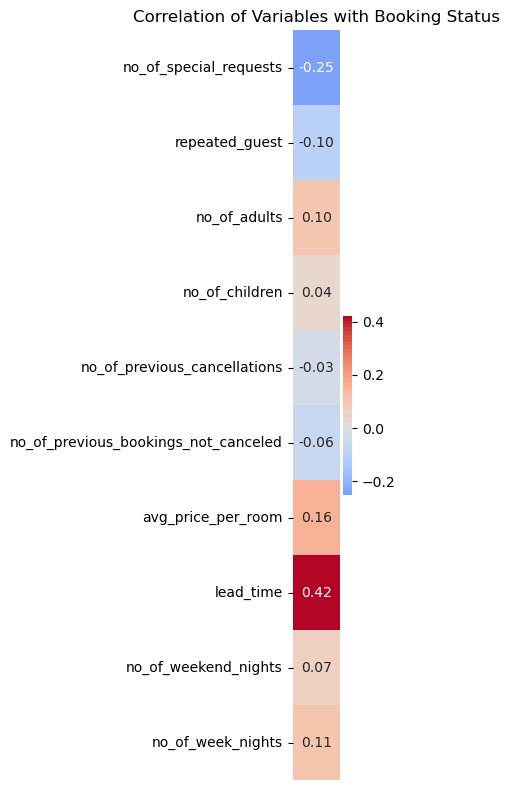

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encode booking_status as numeric
train_encoded = train.copy()
train_encoded['booking_status'] = train_encoded['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

# Columns to check correlation
discrete_cols = ['no_of_special_requests', 'repeated_guest', 'no_of_adults', 'no_of_children',
                 'no_of_previous_cancellations','no_of_previous_bookings_not_canceled']
numerical_cols = ['avg_price_per_room', 'lead_time', 'no_of_weekend_nights', 'no_of_week_nights']
cols_for_corr = discrete_cols + numerical_cols

# Compute correlation with booking_status
corr_with_response = train_encoded[cols_for_corr + ['booking_status']].corr()['booking_status'].drop('booking_status')

# Convert to DataFrame (single-column for vertical heatmap)
corr_df = corr_with_response.to_frame()  # N x 1

# Plot vertical heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Correlation of Variables with Booking Status')
plt.xticks([])  # hide x-axis labels since it's single-column
plt.yticks(rotation=0)  # keep y-axis labels horizontal for readability
plt.tight_layout()
plt.show()


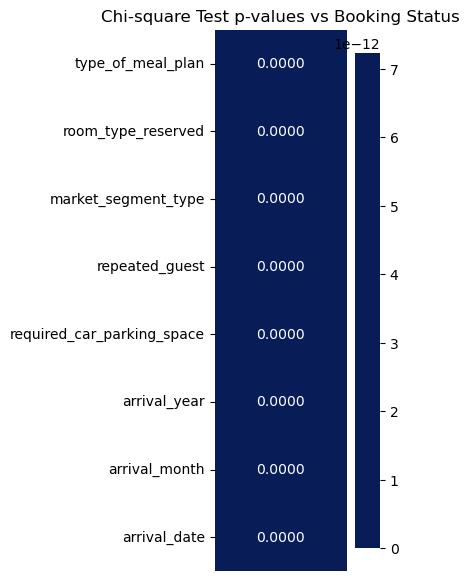

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'repeated_guest',
                    'required_car_parking_space','arrival_year',
                   'arrival_month','arrival_date']
# Store Chi-square and p-values
chi2_results = {}
p_values = {}

for col in categorical_cols:
    # Create contingency table
    contingency_table = pd.crosstab(train[col], train['booking_status'])
    
    # Chi-square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    # Store results
    chi2_results[col] = chi2
    p_values[col] = p

# Convert to DataFrame
pval_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p_value'])

# Plot vertical heatmap of p-values
plt.figure(figsize=(4, 6))
sns.heatmap(pval_df, annot=True, cmap='YlGnBu_r', center=0.05, fmt=".4f")  # reversed color so smaller p = darker
plt.title('Chi-square Test p-values vs Booking Status')
plt.xticks([])  # hide x-axis
plt.yticks(rotation=0)  # horizontal variable labels
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Combine numeric and discrete numeric columns
discrete_cols = ['no_of_special_requests', 'repeated_guest', 'no_of_adults', 'no_of_children',
                 'no_of_previous_cancellations','no_of_previous_bookings_not_canceled']
numerical_cols = ['avg_price_per_room', 'lead_time', 'no_of_weekend_nights', 'no_of_week_nights']
cols_for_vif = discrete_cols + numerical_cols

# Select only training set
X = train[cols_for_vif]

# Compute VIF for each column
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                                feature        VIF
0                no_of_special_requests   1.742805
1                        repeated_guest   1.593567
2                          no_of_adults  11.709249
3                        no_of_children   1.242273
4          no_of_previous_cancellations   1.257450
5  no_of_previous_bookings_not_canceled   1.579244
6                    avg_price_per_room  10.058580
7                             lead_time   2.101875
8                  no_of_weekend_nights   1.931545
9                     no_of_week_nights   3.484483


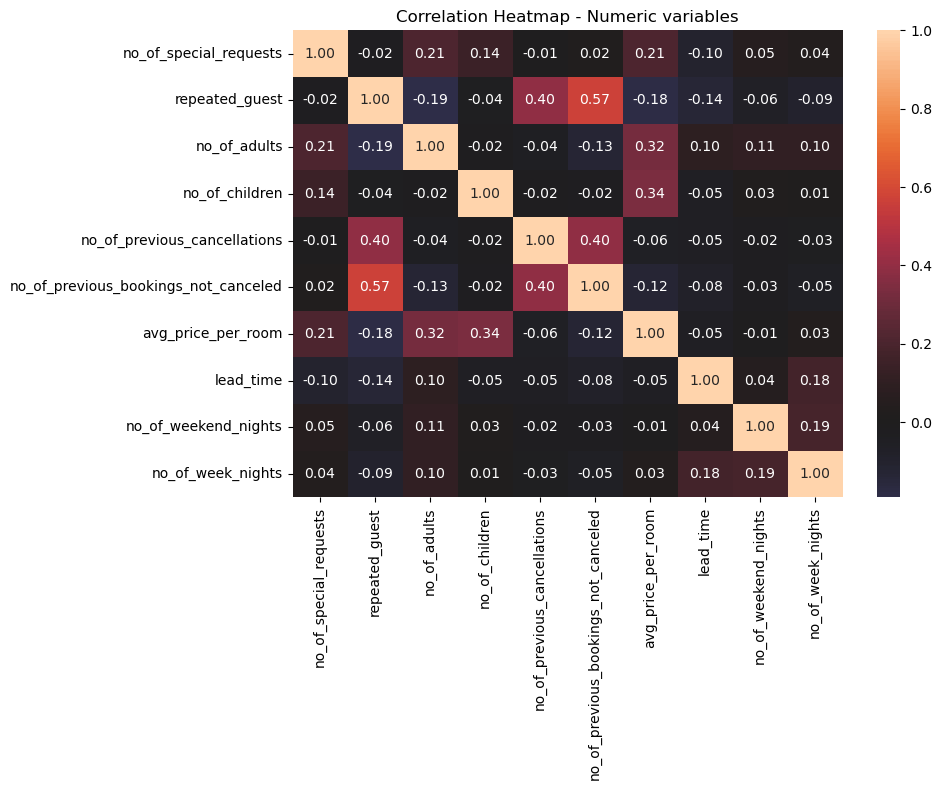

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric + discrete numeric variables
discrete_cols = ['no_of_special_requests', 'repeated_guest', 'no_of_adults', 'no_of_children',
                 'no_of_previous_cancellations','no_of_previous_bookings_not_canceled']
numerical_cols = ['avg_price_per_room', 'lead_time', 'no_of_weekend_nights', 'no_of_week_nights']
cols_numeric = discrete_cols + numerical_cols

# Compute correlation matrix
corr_numeric = train[cols_numeric].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_numeric, annot=True, cmap='icefire', center=0, fmt=".2f")
plt.title('Correlation Heatmap - Numeric variables')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'repeated_guest',
                    'required_car_parking_space','arrival_year',
                   'arrival_month','arrival_date']

# One-hot encode categorical variables (drop first to avoid dummy variable trap)
X_cat = pd.get_dummies(train[categorical_cols], drop_first=True)

# Ensure all columns are numeric
X_cat = X_cat.astype(float)

# Check for any NaNs and fill with 0 (safe for VIF calculation)
X_cat = X_cat.fillna(0)

# Compute VIF
vif_data_cat = pd.DataFrame()
vif_data_cat['feature'] = X_cat.columns
vif_data_cat['VIF'] = [variance_inflation_factor(X_cat.values, i) for i in range(X_cat.shape[1])]

print(vif_data_cat)


                              feature         VIF
0                      repeated_guest    1.291669
1          required_car_parking_space    1.053422
2                        arrival_year  350.999412
3                       arrival_month    6.605238
4                        arrival_date    4.190543
5       type_of_meal_plan_Meal Plan 2    1.264129
6       type_of_meal_plan_Meal Plan 3    1.021675
7      type_of_meal_plan_Not Selected    1.342345
8      room_type_reserved_Room_Type 2    1.047935
9      room_type_reserved_Room_Type 3    1.004020
10     room_type_reserved_Room_Type 4    1.377597
11     room_type_reserved_Room_Type 5    1.018677
12     room_type_reserved_Room_Type 6    1.069329
13     room_type_reserved_Room_Type 7    1.048484
14  market_segment_type_Complementary    4.884065
15      market_segment_type_Corporate   20.741762
16        market_segment_type_Offline  104.310284
17         market_segment_type_Online  216.470702


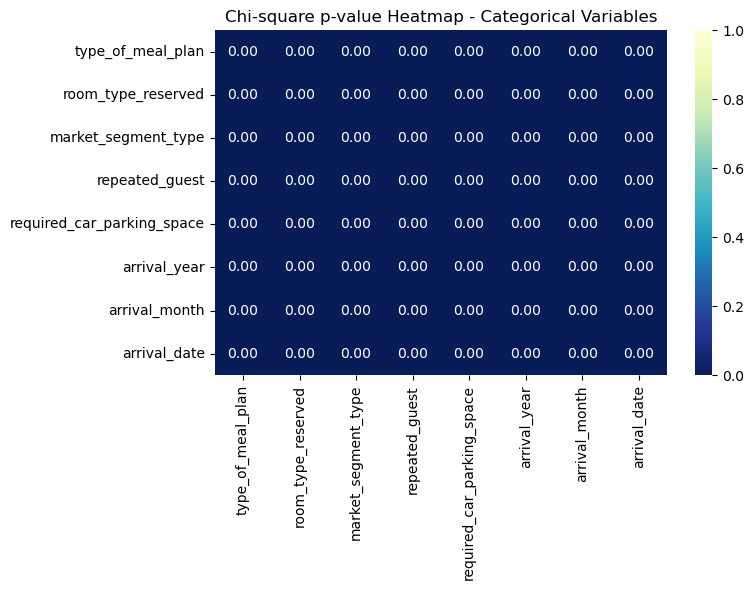

In [27]:
from scipy.stats import chi2_contingency
import numpy as np

categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'repeated_guest',
                    'required_car_parking_space','arrival_year',
                   'arrival_month','arrival_date']


# Initialize p-value DataFrame
pval_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols, dtype=float)

# Compute pairwise Chi-square p-values
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            pval_matrix.loc[col1, col2] = 0  # self vs self
        else:
            contingency = pd.crosstab(train[col1], train[col2])
            chi2, p, dof, ex = chi2_contingency(contingency)
            pval_matrix.loc[col1, col2] = p

# Plot heatmap
plt.figure(figsize=(8, 6))
pval_matrix_clipped = pval_matrix.astype(float).clip(upper=1.0)
sns.heatmap(pval_matrix_clipped, annot=True, cmap='YlGnBu_r', fmt=".2f", vmin=0, vmax=1)
plt.title('Chi-square p-value Heatmap - Categorical Variables')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [28]:
x_train = train.drop('booking_status', axis=1)
y_train = train['booking_status']

print(x_train.head())


   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             1               0                     0                  2   
1             2               0                     0                  2   
2             2               0                     0                  2   
3             2               0                     0                  2   
4             1               0                     0                  4   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 2                           0        Room_Type 1        257   
1       Meal Plan 2                           0        Room_Type 1        257   
2       Meal Plan 2                           0        Room_Type 1        257   
3       Meal Plan 2                           0        Room_Type 1        257   
4       Meal Plan 1                           0        Room_Type 1         65   

   arrival_year  arrival_month  arrival_date market_segm

In [29]:
print(y_train.head())

0    Not_Canceled
1        Canceled
2        Canceled
3        Canceled
4        Canceled
Name: booking_status, dtype: object


In [30]:
x_test = test.drop('booking_status', axis=1)
y_test = test['booking_status']

print(x_test.head())
print(y_test.head())

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
29020             2               2                     0                  3   
29021             2               0                     0                  1   
29022             2               0                     0                  2   
29023             1               0                     0                  2   
29024             1               0                     1                  3   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
29020       Meal Plan 1                           0        Room_Type 6   
29021      Not Selected                           0        Room_Type 1   
29022       Meal Plan 1                           0        Room_Type 4   
29023       Meal Plan 1                           0        Room_Type 1   
29024       Meal Plan 1                           0        Room_Type 4   

       lead_time  arrival_year  arrival_month  arrival_date  \
29020      

In [31]:
import prince
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

famd = prince.FAMD(n_components=5, random_state=42)
famd_data = famd.fit_transform(x_train) 

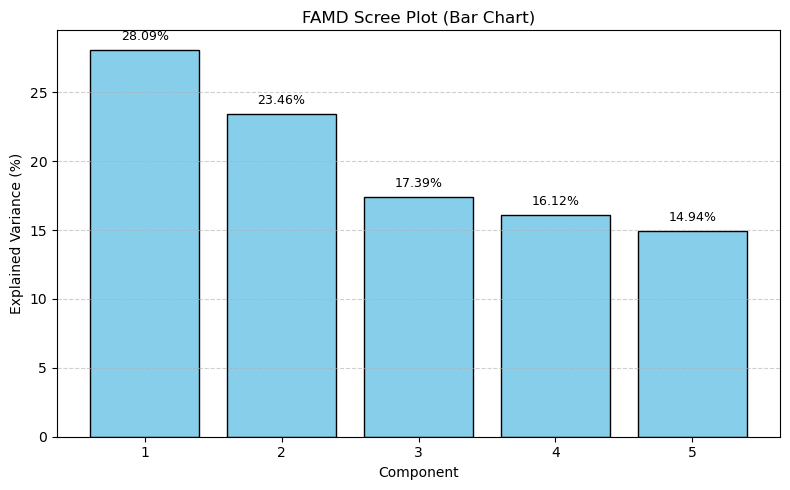

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Extract explained variance (inertia) in percentage
eigenvalues = famd.eigenvalues_
explained_var = (eigenvalues / eigenvalues.sum()) * 100

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_var) + 1), explained_var, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Component")
plt.ylabel("Explained Variance (%)")
plt.title("FAMD Scree Plot (Bar Chart)")
plt.xticks(range(1, len(explained_var) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Optionally annotate each bar with its percentage value
for i, v in enumerate(explained_var):
    plt.text(i + 1, v + 0.5, f"{v:.2f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


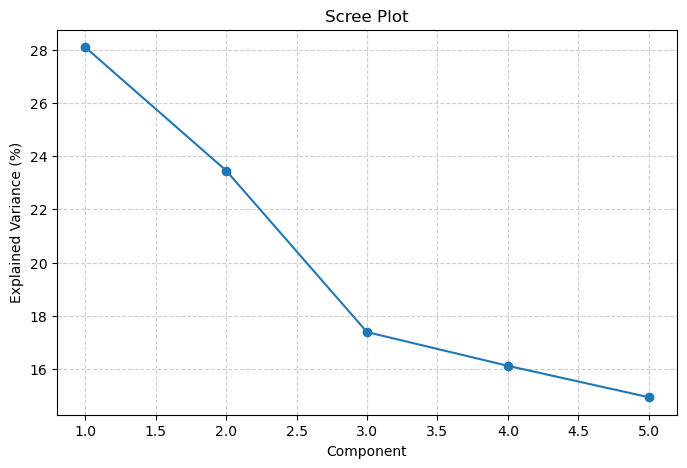

In [33]:
eigenvalues = famd.eigenvalues_

explained_variance = (eigenvalues / eigenvalues.sum()) * 100

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'o-')
plt.xlabel("Component")
plt.ylabel("Explained Variance (%)")
plt.title("Scree Plot")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



In [34]:
silhouettes = []
K = range(2, 8)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    preds = model.fit_predict(famd_data)
    silhouettes.append(silhouette_score(famd_data, preds))

best_k = K[silhouettes.index(max(silhouettes))]
print(f"Best number of clusters (k) = {best_k}")

best_score = max(silhouettes)
best_k = K[silhouettes.index(best_score)]
print(f"Highest silhouette score: {best_score:.4f}")

Best number of clusters (k) = 2
Highest silhouette score: 0.6774


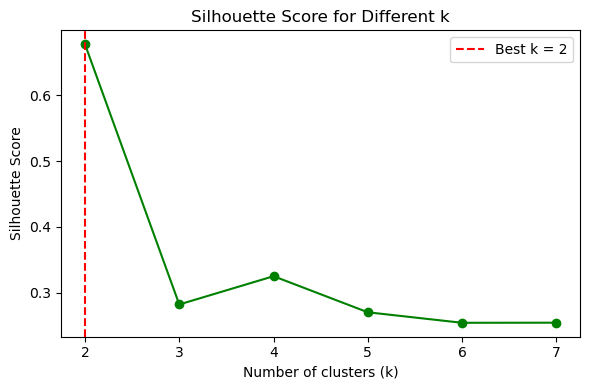

In [35]:
plt.figure(figsize=(6, 4))
plt.plot(K, silhouettes, 'o-', color='green')
plt.axvline(best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.tight_layout()
plt.show()


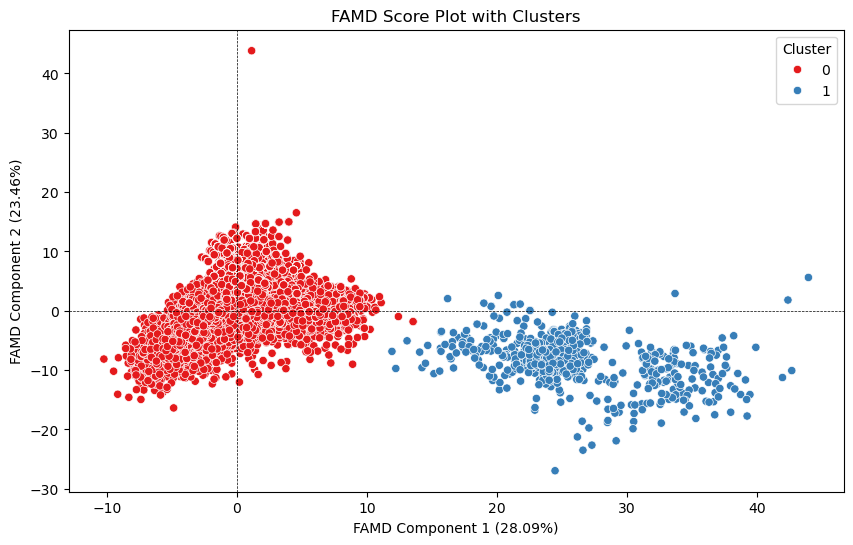

In [36]:
# Select only the FAMD component columns (numeric)
X_famd = famd_data.iloc[:, :5]  # first 5 components

# Fit KMeans on numeric components only
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_famd)

# Add cluster labels to the FAMD DataFrame for plotting
famd_data['cluster'] = clusters

# Plot FAMD score plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=famd_data.iloc[:, 0],
    y=famd_data.iloc[:, 1],
    hue=famd_data['cluster'],
    palette='Set1'
)
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("FAMD Component 1 (28.09%)")
plt.ylabel("FAMD Component 2 (23.46%)")
plt.title(f"FAMD Score Plot with Clusters")
plt.legend(title='Cluster')
plt.show()


In [37]:
# Separate numeric and categorical columns
numeric_cols = ['lead_time','avg_price_per_room','no_of_previous_cancellations',
                'no_of_previous_bookings_not_canceled','no_of_weekend_nights','no_of_week_nights','arrival_date']

cat_cols = ['no_of_adults', 'no_of_children', 
            'type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
            'required_car_parking_space','repeated_guest','arrival_year', 'arrival_month', 
                'no_of_special_requests']

# Add cluster labels to original x_train
x_train = x_train.copy()  # avoid modifying original data
x_train['cluster'] = famd_data['cluster'].values  # ensure alignment

# Numeric summary
numeric_summary = x_train.groupby('cluster')[numeric_cols].mean()
print("\nNumeric features per cluster:\n", numeric_summary)

# Categorical summary
for col in cat_cols:
    print(f"\nCluster distribution for {col}:")
    print(pd.crosstab(x_train['cluster'], x_train[col], normalize='index') * 100)



Numeric features per cluster:
          lead_time  avg_price_per_room  no_of_previous_cancellations  \
cluster                                                                
0        83.173617          104.866547                      0.000000   
1        10.668975           63.799169                      0.995845   

         no_of_previous_bookings_not_canceled  no_of_weekend_nights  \
cluster                                                               
0                                    0.000000              0.812884   
1                                    5.542936              0.455679   

         no_of_week_nights  arrival_date  
cluster                                   
0                 2.206834     15.548696  
1                 1.353186     14.473684  

Cluster distribution for no_of_adults:
no_of_adults         0          1          2         3         4
cluster                                                         
0             0.371051  19.542017  73.432751  6.6188

In [38]:
# Count of rows per cluster
cluster_counts = x_train['cluster'].value_counts()
print(cluster_counts)


cluster
0    28298
1      722
Name: count, dtype: int64


cluster                 0         1
booking_status                     
Canceled        99.882692  0.117308
Not_Canceled    96.380390  3.619610


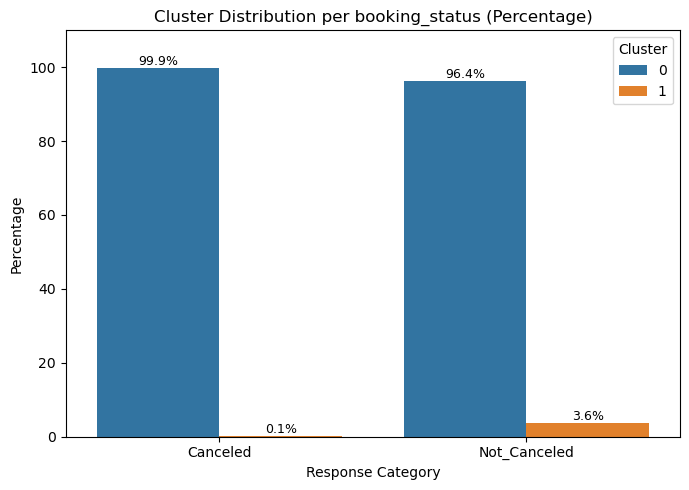

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute percentages per response (row-wise)
ct_response = pd.crosstab(y_train, x_train['cluster'], normalize='index') * 100
print(ct_response)

# The index name after crosstab is usually 'booking_status'
ct_plot = ct_response.reset_index().melt(
    id_vars=y_train.name,  # use the actual Series name instead of response_var
    var_name='cluster', 
    value_name='percentage'
)

# Bar plot with percentages
plt.figure(figsize=(7,5))
ax = sns.barplot(
    x=y_train.name, 
    y='percentage', 
    hue='cluster', 
    data=ct_plot,
    palette=['#1f77b4', '#ff7f0e']
)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

plt.title(f"Cluster Distribution per {y_train.name} (Percentage)", fontsize=12)
plt.ylabel("Percentage")
plt.xlabel("Response Category")
plt.ylim(0, 110)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


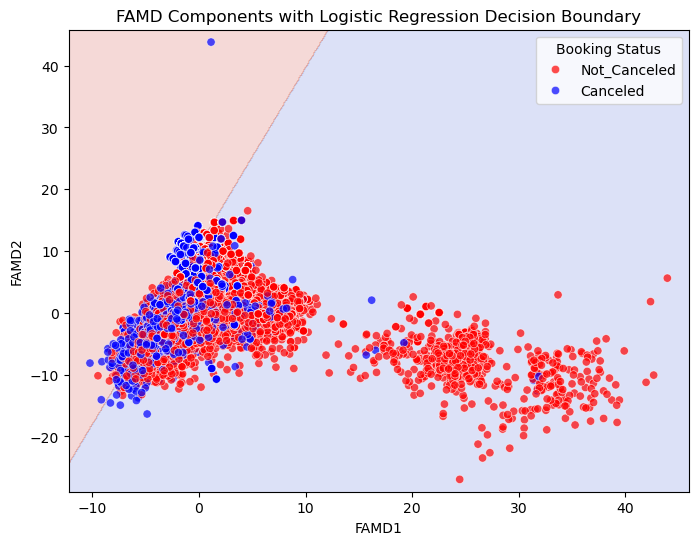

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Convert FAMD output to a numeric DataFrame
famd_df = pd.DataFrame(
    famd_data.values,
    columns=[f"FAMD{i+1}" for i in range(famd_data.shape[1])]
)
famd_df['booking_status'] = y_train.reset_index(drop=True)

# Use only the first two FAMD components for visualization
X = famd_df[['FAMD1', 'FAMD2']].values
y = (famd_df['booking_status'] == 'Canceled').astype(int).values  # binary encoding

# Fit a linear classifier
model = LogisticRegression()
model.fit(X, y)

# Create grid for decision boundary
x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot scatter and boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
sns.scatterplot(
    x='FAMD1', y='FAMD2',
    hue='booking_status',
    data=famd_df,
    palette={'Not_Canceled': 'red', 'Canceled': 'blue'},
    alpha=0.7
)
plt.title("FAMD Components with Logistic Regression Decision Boundary")
plt.xlabel("FAMD1")
plt.ylabel("FAMD2")
plt.legend(title='Booking Status')
plt.show()


In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
le.classes_

array(['Canceled', 'Not_Canceled'], dtype=object)

0 = booking not canceled

1 = booking canceled

In [42]:
y_test = le.transform(y_test) 


In [43]:
print(x_test.head())

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
29020             2               2                     0                  3   
29021             2               0                     0                  1   
29022             2               0                     0                  2   
29023             1               0                     0                  2   
29024             1               0                     1                  3   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
29020       Meal Plan 1                           0        Room_Type 6   
29021      Not Selected                           0        Room_Type 1   
29022       Meal Plan 1                           0        Room_Type 4   
29023       Meal Plan 1                           0        Room_Type 1   
29024       Meal Plan 1                           0        Room_Type 4   

       lead_time  arrival_year  arrival_month  arrival_date  \
29020      

In [46]:
numeric_cols = ['lead_time', 'avg_price_per_room']
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
passthrough_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 
                    'no_of_week_nights', 'required_car_parking_space', 'arrival_year', 
                    'arrival_month', 'arrival_date', 'repeated_guest', 
                    'no_of_special_requests', 'no_of_previous_cancellations', 
                    'no_of_previous_bookings_not_canceled']

all_cols = numeric_cols + categorical_cols + passthrough_cols

import pandas as pd

x_train_df = pd.DataFrame(x_train, columns=all_cols)
x_test_df  = pd.DataFrame(x_test, columns=all_cols)

print(x_train_df.head())


   lead_time  avg_price_per_room type_of_meal_plan room_type_reserved  \
0        257                80.0       Meal Plan 2        Room_Type 1   
1        257               101.5       Meal Plan 2        Room_Type 1   
2        257               101.5       Meal Plan 2        Room_Type 1   
3        257               101.5       Meal Plan 2        Room_Type 1   
4         65                68.0       Meal Plan 1        Room_Type 1   

  market_segment_type  no_of_adults  no_of_children  no_of_weekend_nights  \
0             Offline             1               0                     0   
1              Online             2               0                     0   
2              Online             2               0                     0   
3              Online             2               0                     0   
4              Online             1               0                     0   

   no_of_week_nights  required_car_parking_space  arrival_year  arrival_month  \
0                

In [47]:
print(x_test.head())

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
29020             2               2                     0                  3   
29021             2               0                     0                  1   
29022             2               0                     0                  2   
29023             1               0                     0                  2   
29024             1               0                     1                  3   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
29020       Meal Plan 1                           0        Room_Type 6   
29021      Not Selected                           0        Room_Type 1   
29022       Meal Plan 1                           0        Room_Type 4   
29023       Meal Plan 1                           0        Room_Type 1   
29024       Meal Plan 1                           0        Room_Type 4   

       lead_time  arrival_year  arrival_month  arrival_date  \
29020      

In [50]:
# Drop cluster if it exists
x_train = x_train_df.drop(columns=['cluster'], errors='ignore')
x_test = x_test_df.drop(columns=['cluster'], errors='ignore')

# Redefine preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_cols = ['lead_time', 'avg_price_per_room']
cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ],
    remainder='passthrough'
)

# Fit on train, transform test
x_train = preprocessor.fit_transform(x_train_df)
x_test = preprocessor.transform(x_test_df)


In [53]:
import pandas as pd

# Get feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Convert to DataFrames
x_train = pd.DataFrame(x_train, columns=feature_names, index=x_train_df.index)
x_test = pd.DataFrame(x_test, columns=feature_names, index=x_test_df.index)


In [54]:
print(x_test.head())

       num__lead_time  num__avg_price_per_room  \
29020       -0.324550                 2.442384   
29021       -0.632241                -0.191694   
29022       -0.607626                 1.507058   
29023       -0.915317                 0.594204   
29024        0.020065                 0.799245   

       cat__type_of_meal_plan_Meal Plan 2  cat__type_of_meal_plan_Meal Plan 3  \
29020                                 0.0                                 0.0   
29021                                 0.0                                 0.0   
29022                                 0.0                                 0.0   
29023                                 0.0                                 0.0   
29024                                 0.0                                 0.0   

       cat__type_of_meal_plan_Not Selected  \
29020                                  0.0   
29021                                  1.0   
29022                                  0.0   
29023                       

In [55]:
print(x_train.head())

   num__lead_time  num__avg_price_per_room  \
0        2.161596                -0.669749   
1        2.161596                -0.065861   
2        2.161596                -0.065861   
3        2.161596                -0.065861   
4       -0.201473                -1.006804   

   cat__type_of_meal_plan_Meal Plan 2  cat__type_of_meal_plan_Meal Plan 3  \
0                                 1.0                                 0.0   
1                                 1.0                                 0.0   
2                                 1.0                                 0.0   
3                                 1.0                                 0.0   
4                                 0.0                                 0.0   

   cat__type_of_meal_plan_Not Selected  cat__room_type_reserved_Room_Type 2  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                      

In [56]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


In [57]:
print(y_train.head())

   0
0  1
1  0
2  0
3  0
4  0


In [58]:
print(y_test.head())

   0
0  0
1  0
2  1
3  1
4  0


In [51]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply only on training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())


Before SMOTE: 1    19643
0     9377
Name: count, dtype: int64
After SMOTE: 1    19643
0    19643
Name: count, dtype: int64


In [62]:
# Get feature names from preprocessor
feature_names = preprocessor.get_feature_names_out()

# Convert X after SMOTE back to DataFrame
x_train_resampled = pd.DataFrame(x_train_resampled, columns=feature_names)

# Keep y_train_resampled as a Series
y_train_resampled = pd.Series(y_train_resampled, name='booking_status')


In [61]:
print(x_train_resampled.head())

   num__lead_time  num__avg_price_per_room  \
0        2.161596                -0.669749   
1        2.161596                -0.065861   
2        2.161596                -0.065861   
3        2.161596                -0.065861   
4       -0.201473                -1.006804   

   cat__type_of_meal_plan_Meal Plan 2  cat__type_of_meal_plan_Meal Plan 3  \
0                                 1.0                                 0.0   
1                                 1.0                                 0.0   
2                                 1.0                                 0.0   
3                                 1.0                                 0.0   
4                                 0.0                                 0.0   

   cat__type_of_meal_plan_Not Selected  cat__room_type_reserved_Room_Type 2  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                      

In [63]:
print(y_train_resampled.head())

0    1
1    0
2    0
3    0
4    0
Name: booking_status, dtype: int32
